In [51]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math

In [52]:
def coefficient(x,y,dim, log = False):
    if log == True:
        y = np.log(y)    
    else:
        None
    x.reshape(dim,1)
    y.reshape(dim,1)
    A = [[1,x[i]] for i in range(len(x))]
    U = np.dot(np.linalg.inv(np.dot(np.transpose(A),A)),np.transpose(A))
    p = np.dot(U,y)
    if log == True:
        p[0] = np.exp(p[0])
    return p[0],p[1]

## $\textbf{Linear:}$
Usando os dados do Laboratorio de Física III, prática 1, experimento do resistor

In [53]:
data = pd.read_csv("voltagem.csv")
X = data['V'].values
Y = data['I'].values
dim = data.shape[0]
c,m = coefficient(X,Y,dim)
print(c,m)

-0.009910505775590474 0.0103401616433919


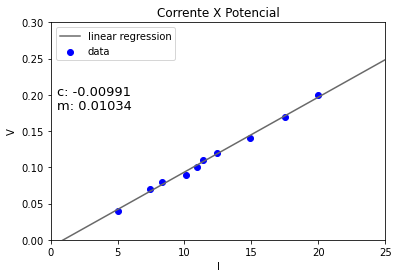

In [54]:
x_fun = np.array(range(-10,100)) 
y_fun =  x_fun*m + c
plt.scatter(X,Y, color = 'b')
plt.plot(x_fun,y_fun, color = 'dimgrey')
plt.xlabel("I")
plt.ylabel("V")
plt.title("Corrente X Potencial")
plt.legend(("linear regression","data"),loc = "upper left")
plt.text(0.5, .20, 'c: ' + str("%.5f"%c), {'fontsize': 13})
plt.text(0.5, .18, 'm: ' + str("%.5f"%m), {'fontsize': 13})
plt.xlim(0,25)
plt.ylim(0,0.3)
plt.savefig('Corrente.png')
plt.show()

## $\textbf{Não Linear:}$ 
Potência útil X Resistência

In [55]:
data = np.loadtxt('putil.csv', delimiter=',')
dim = data.shape[0]
x = data[:,0]
y = data[:,1]
c,m = coefficient(x,y,dim, log = True)
print(c,m)

0.032570597621881 -0.005114358606663366


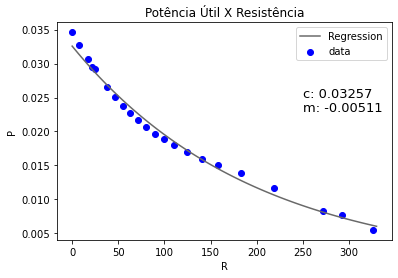

In [56]:
plt.scatter(x,y, color = 'blue')
t = np.linspace(0,330,101)
p = c*np.exp(m*t)
plt.plot(t,p,color = 'dimgrey')
plt.xlabel("R")
plt.ylabel("P")
plt.title("Potência Útil X Resistência")
plt.legend(("Regression","data"),loc = "upper right")
plt.text(250,0.025, 'c: ' + str("%.5f"%c), {'fontsize': 13})
plt.text(250,0.023, 'm: ' + str("%.5f"%m), {'fontsize': 13})
plt.savefig("Potencia.png")
plt.show()

## $\textbf{Surface fitting: }$ 

In [57]:
data = pd.read_csv("nascar.csv")
dim = data.shape[0]
y = data['lap'].values
x = data['time'].values
z = data['speed'].values

In [58]:
m = np.shape(data)[0]
logx = np.log(x).reshape(m,1)
logy = np.log(y).reshape(m,1)
logz = np.log(z).reshape(m,1)
A = np.concatenate((logx**0,logx,logy), axis=1)
U = np.dot(np.linalg.inv(np.dot(np.transpose(A),A)),np.transpose(A))
p_vec = np.dot(U,logz)
print(p_vec)

[[4.57386395]
 [0.37195258]
 [0.14817921]]


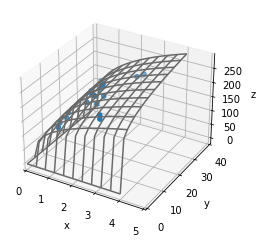

In [59]:
a, b, c = p_vec[:,]
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x,y,z)

x = np.linspace(0,4,21)
y = np.linspace(0,40,21)
X, Y = np.meshgrid(x,y)
Z = (np.exp(a))*(X**b)*(Y**c)
ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2, color = "dimgrey")
plt.xlim(0,5)
plt.ylim(0,40)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()